# Matplotlib Pyber

## Dependencies and Setup

In [1]:
%matplotlib inline
%autosave 300
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Autosaving every 300 seconds


## Reading .csv and generating Data Frame

In [2]:
# File to Load (Remember to change these)
city_csv = "../Resources/city_data.csv"
ride_csv = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_raw = pd.read_csv(city_csv)
ride_raw = pd.read_csv(ride_csv)

# Combine the data into a single dataset
raw = ride_raw.merge(city_raw, how = 'left', on = 'city')

# Display the data table for preview
raw.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Generating Data Frames with scatter plot values

In [3]:
# Obtain the x and y coordinates for each of the three city types

# Generate groupby city object
raw_grouped_urban = raw[raw['type'] == 'Urban'].groupby([raw['city']])
raw_grouped_suburban = raw[raw['type'] == 'Suburban'].groupby([raw['city']])
raw_grouped_rural = raw[raw['type'] == 'Rural'].groupby([raw['city']])

# Urban
urban = pd.DataFrame(raw_grouped_urban.count()['ride_id'])
urban.columns = ['x']
urban['y'] = pd.DataFrame(raw_grouped_urban.mean()['fare'])
urban['s'] = pd.DataFrame(raw_grouped_urban.mean()['driver_count'])

# Suburban
suburban = pd.DataFrame(raw_grouped_suburban.count()['ride_id'])
suburban.columns = ['x']
suburban['y'] = pd.DataFrame(raw_grouped_suburban.mean()['fare'])
suburban['s'] = pd.DataFrame(raw_grouped_suburban.mean()['driver_count'])

# Rural
rural = pd.DataFrame(raw_grouped_rural.count()['ride_id'])
rural.columns = ['x']
rural['y'] = pd.DataFrame(raw_grouped_rural.mean()['fare'])
rural['s'] = pd.DataFrame(raw_grouped_rural.mean()['driver_count'])

## Generating the scatter plot

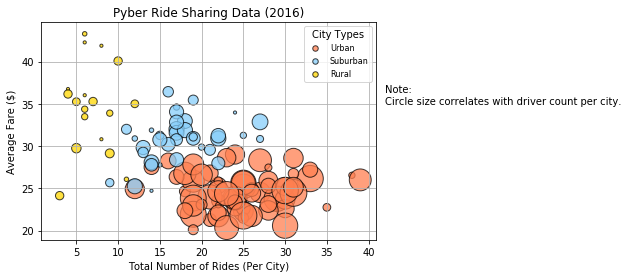

In [4]:
# Build the scatter plots for each city types
plt.scatter(urban['x'], urban['y'], label = 'Urban', s = urban['s'] * 10, color = ['coral'], edgecolor = 'black', alpha = .75, marker = 'o')
plt.scatter(suburban['x'], suburban['y'], label = 'Suburban', s = suburban['s'] * 10, color = ['lightskyblue'], edgecolor = 'black', alpha = .75, marker = 'o')
plt.scatter(rural['x'], rural['y'], label = 'Rural', s = rural['s'] * 10, color = ['gold'], edgecolor = 'black', alpha = .75, marker = 'o')
plt.grid()

# Incorporate the other graph properties
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc = "best") 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data.png", bbox_inches="tight")

## Total Fares by City Type

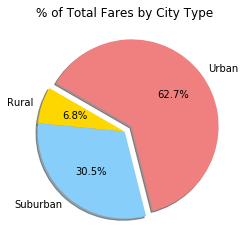

In [5]:
# Calculate Type Percents
raw_grouped_type = raw.groupby([raw['type']])
fare_sum = raw_grouped_type['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode = explode, labels=labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("../Images/Total_Fares_by_City_Type.png")

## Total Rides by City Type

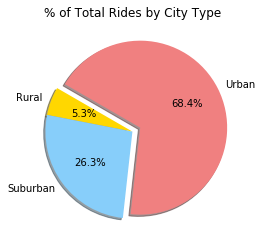

In [6]:
# Calculate Ride Percents
rides_count = raw_grouped_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Total_Rides_by_City_Type.png")

## Total Drivers by City Type

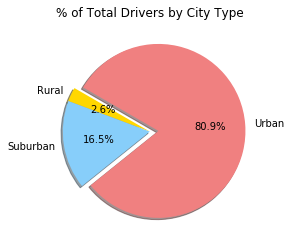

In [7]:
# Calculate Driver Percents
city_grouped_type = city_raw.groupby(['type'])
drivers_sum = city_grouped_type['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Total_Drivers_by_City_Type.")